In [1]:
library("readxl")
df= read_excel("C:/Users/student/Downloads/R/c2015.xlsx")
df$ST_CASE=NULL
df$VEH_NO=NULL
df$PER_NO=NULL
df$LATITUDE=NULL
df$LONGITUD=NULL
df$HOUR=NULL
df$MINUTE=NULL
df$DAY=NULL
df$COUNTY=NULL
df$HARM_EV=NULL
df$PER_TYP = NULL
df$SEAT_POS = NULL
df$YEAR= NULL
df$STATE = factor(df$STATE)
df$MONTH = factor(df$MONTH)
df$AGE = as.numeric(as.character(df$AGE))
df$SEX = factor(df$SEX)
df$INJ_SEV = factor(df$INJ_SEV)
df$STATE = factor(df$STATE)
df$DRINKING= factor(df$DRINKING)
df$MAN_COLL = factor(df$MAN_COLL)
df$OWNER = factor(df$OWNER)
df$MOD_YEAR = factor(df$MOD_YEAR)
df$TRAV_SP = substr(as.character(df$TRAV_SP), 1, 3)
df$TRAV_SP = as.numeric(as.character(df$TRAV_SP))
df$DEFORMED = factor(df$DEFORMED)
df$DAY_WEEK = factor(df$DAY_WEEK)
df$ROUTE = factor(df$ROUTE)
df$LGT_COND = factor(df$LGT_COND)
df$WEATHER = factor(df$WEATHER)

levels(df$DRINKING)=c("No", "Unknown", "Unknown", "Yes")
levels(df$SEX)=c("Female", "Male", "Unknown", "Unknown")
levels(df$INJ_SEV)=c("Major", "Major", "Major", "Minor", "Minor", "Minor", "Major", "Minor")
levels(df$LGT_COND)=c("Light", "Dark", "Dark", "Light", "Light", "Light", "Unknown", "Unknown", "Unknown")
levels(df$WEATHER)=c("Wind", "Clear", "Cloud", "Fog", "Freezing", "Clear", "Rain", "Unknown", "Unknown", "Sleet", "Snow", "Unknown")
library(car)
Spring.set=c("March","April","May")
Summer.set=c("June","July","August")
Autumn.set=c("September","October","November")
Winter.set=c("December","January","February")
df$MONTH=recode(df$MONTH,"Spring.set='Spring'; Summer.set='Summer'; Autumn.set='Autumn'; Winter.set='Winter'")

Northeast.set=c("Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania")
Midwest.set=c("Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota")
South.set=c("Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "Dist of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas")
West.set=c("Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington")
df$STATE=recode(df$STATE, "Northeast.set='Northeast'; Midwest.set='Midwest'; South.set='South'; West.set='West'")

#exclude missing data
str(df)
df=na.exclude(df)
sum(is.na(df))

#check imbalanced data
library(caret)
summary(df$INJ_SEV)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Loading required package: carData


Classes 'tbl_df', 'tbl' and 'data.frame':	80587 obs. of  15 variables:
 $ STATE   : Factor w/ 4 levels "Midwest","Northeast",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ MONTH   : Factor w/ 4 levels "Autumn","Spring",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ AGE     : num  68 49 31 20 40 24 60 64 17 80 ...
 $ SEX     : Factor w/ 3 levels "Female","Male",..: 2 2 2 1 2 2 2 2 2 2 ...
 $ INJ_SEV : Factor w/ 2 levels "Major","Minor": 1 1 1 2 1 1 2 1 2 1 ...
 $ DRINKING: Factor w/ 3 levels "No","Unknown",..: 2 1 3 2 3 1 1 1 2 2 ...
 $ MAN_COLL: Factor w/ 11 levels "Angle","Front-to-Front",..: 4 4 4 4 4 1 1 4 4 4 ...
 $ OWNER   : Factor w/ 8 levels "Driver (in this crash) Not Registered Owner (Other Private Owner Listed)",..: 2 2 2 2 1 2 6 2 2 2 ...
 $ MOD_YEAR: Factor w/ 77 levels "1923","1929",..: 62 65 67 67 64 65 74 65 65 61 ...
 $ TRAV_SP : num  55 70 80 80 75 15 65 45 45 NA ...
 $ DEFORMED: Factor w/ 6 levels "Disabling Damage",..: 1 1 1 1 1 1 1 1 1 3 ...
 $ DAY_WEEK: Factor w/ 7 levels "Friday","Monday",..: 5 

[1] 0

Loading required package: lattice
Loading required package: ggplot2


Major Minor 
12810 12916

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

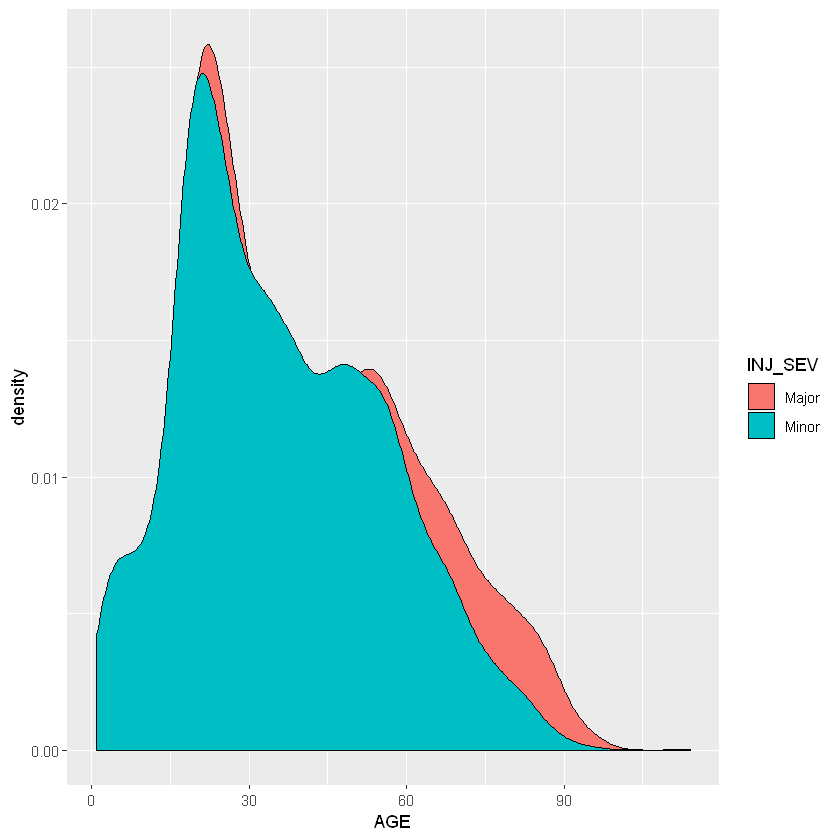

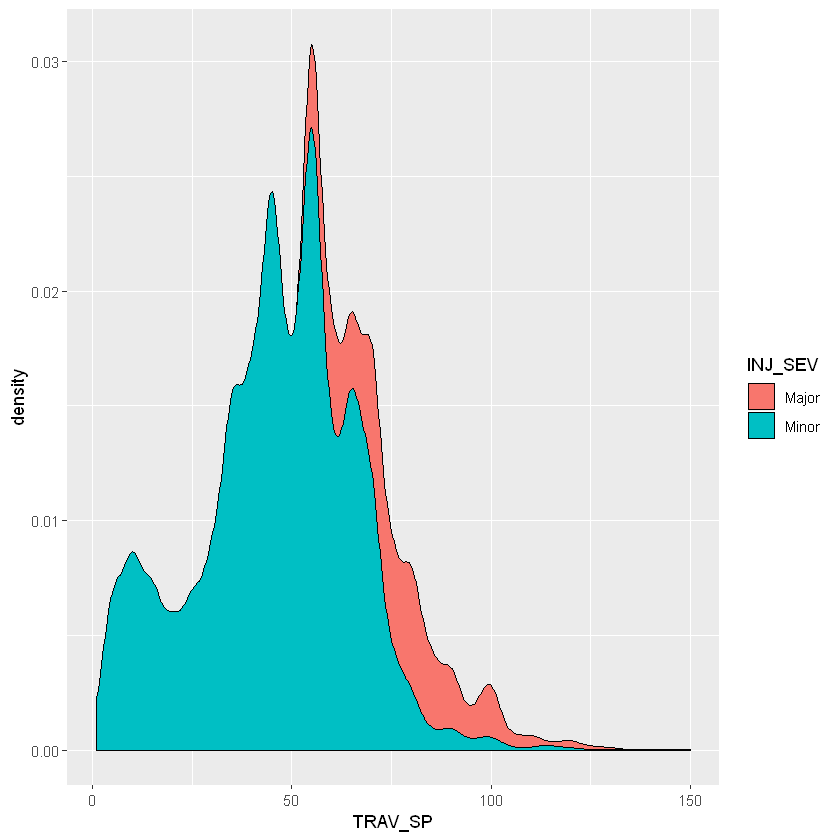

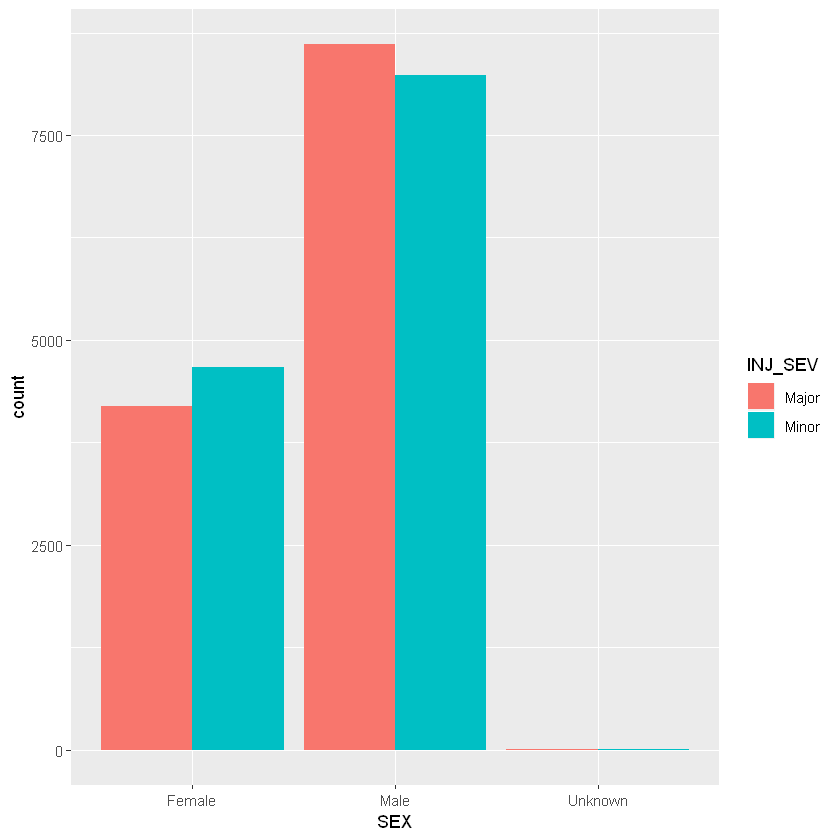

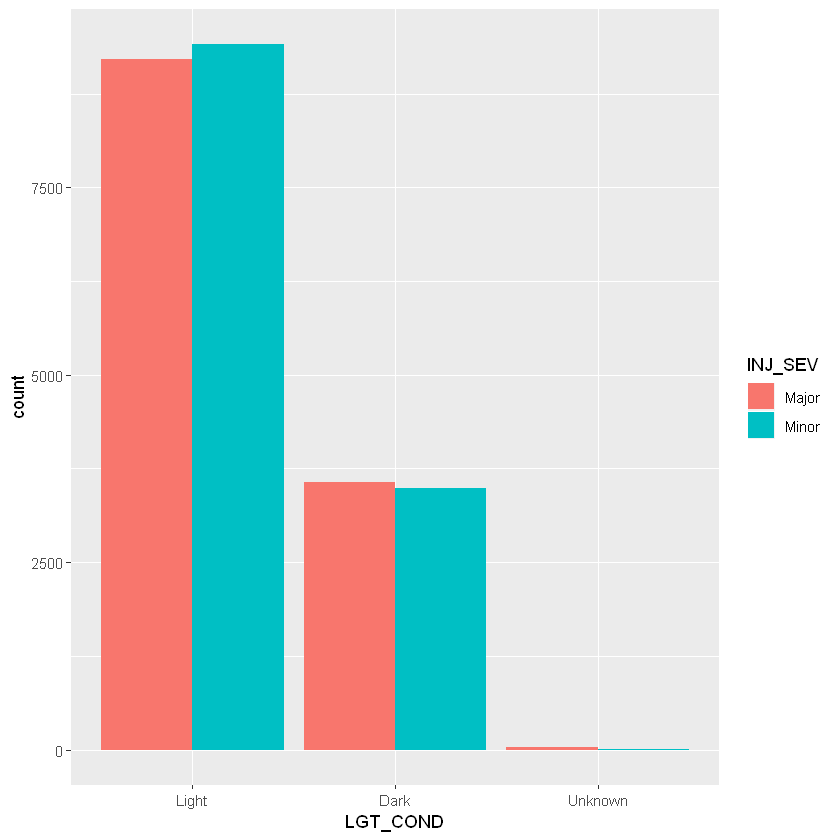

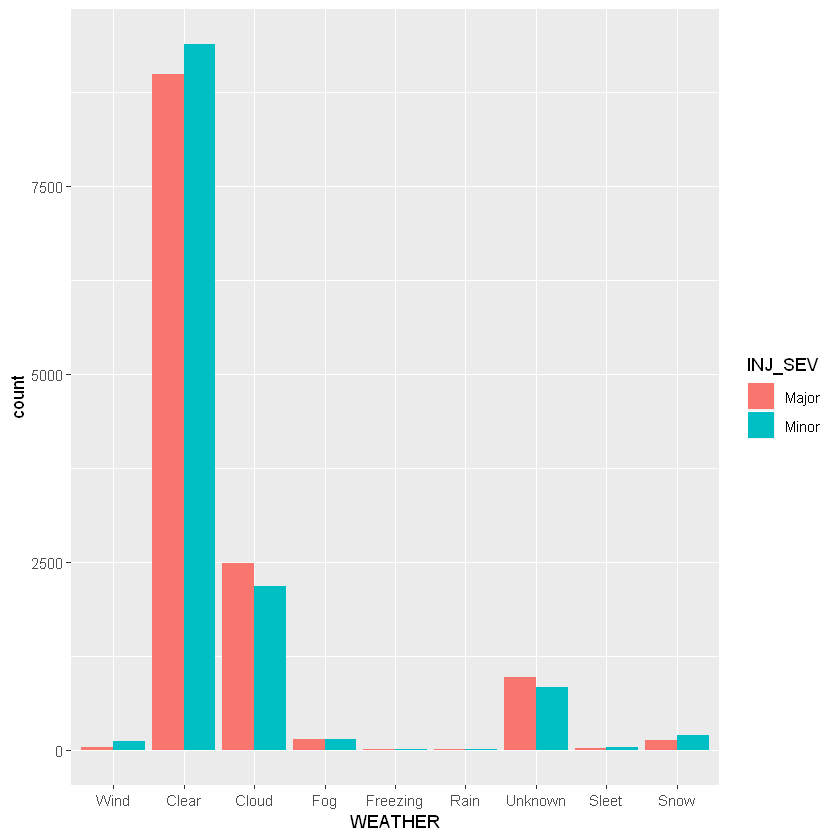

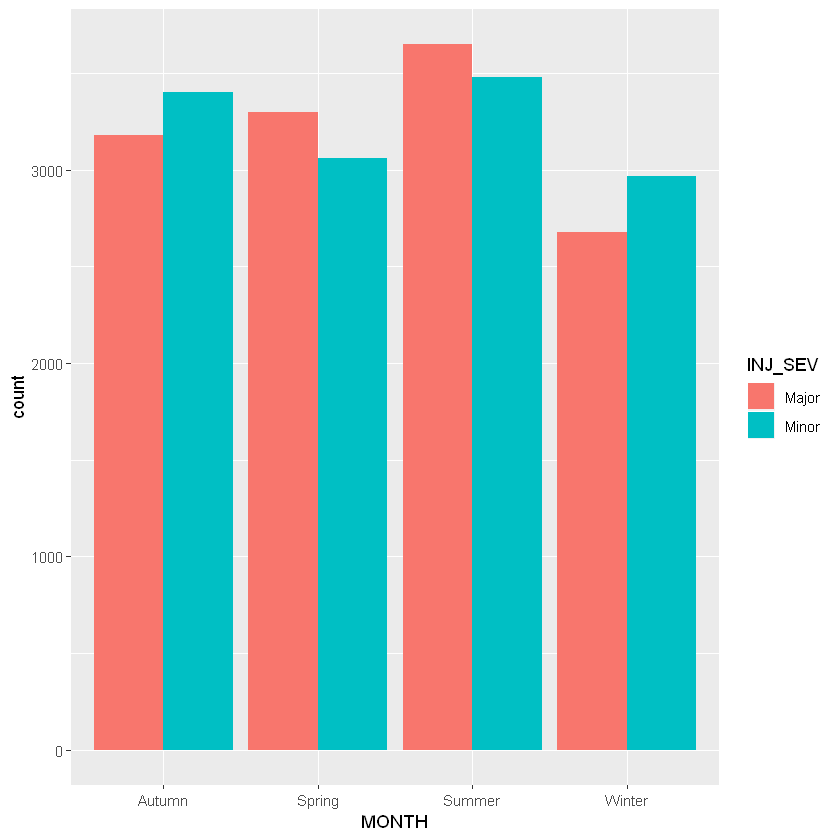

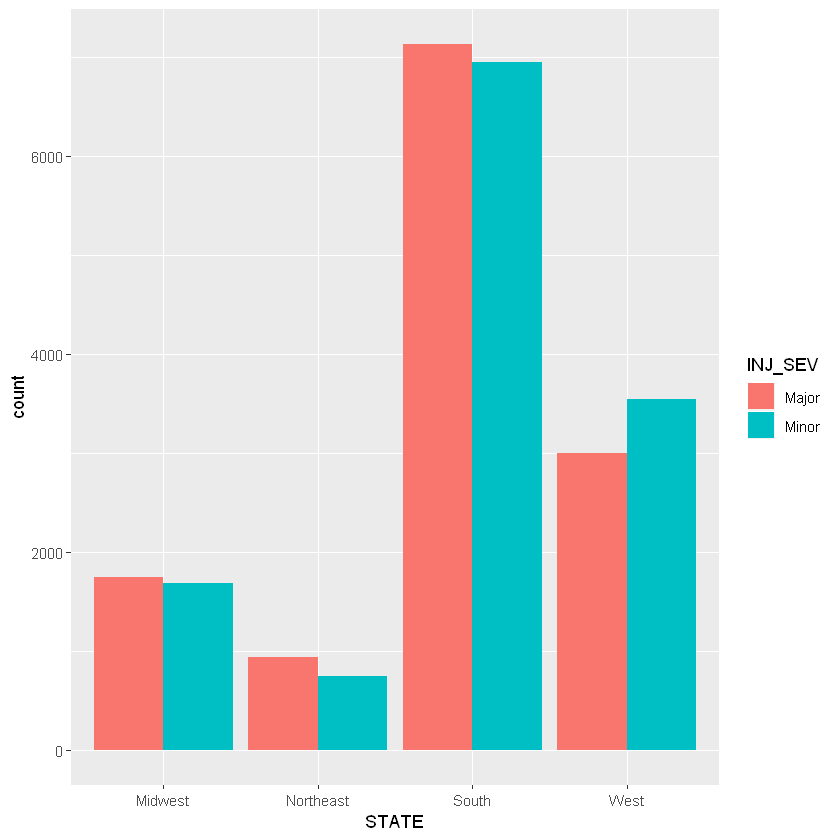

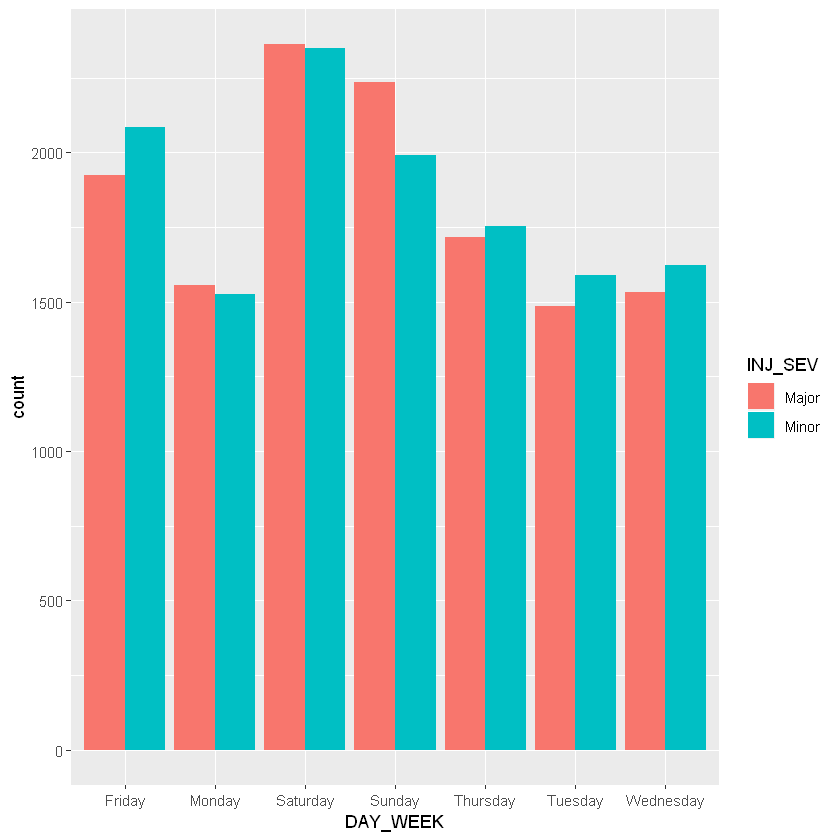

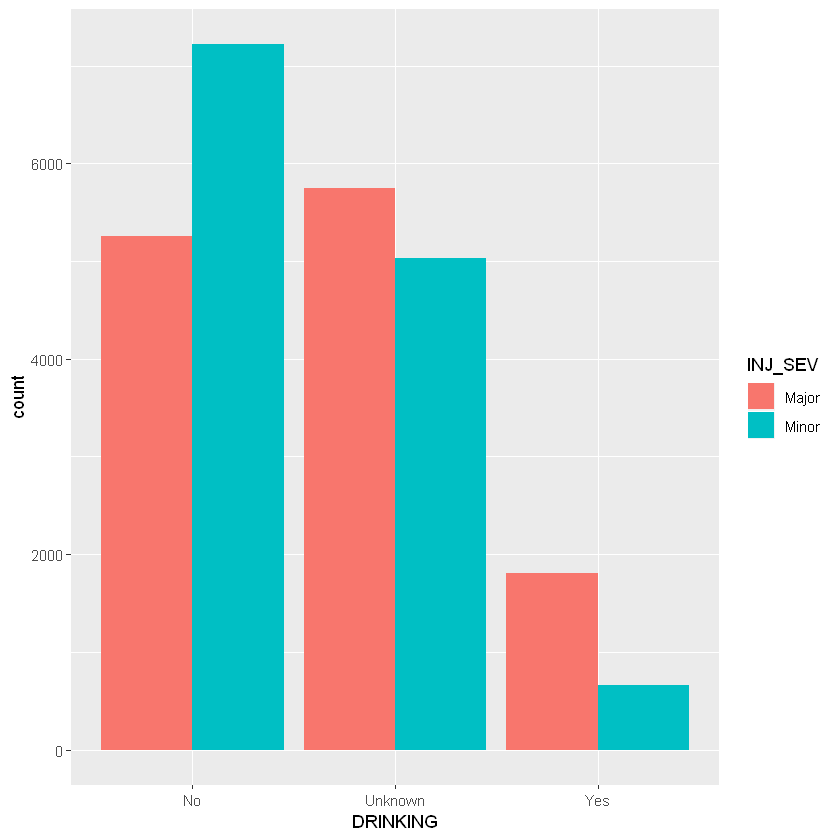

In [2]:
library(ggplot2)
ggplot(df)+geom_density(mapping = aes(x=AGE, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_density(mapping = aes(x=TRAV_SP, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=SEX, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=LGT_COND, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=WEATHER, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=MONTH, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=STATE, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=DAY_WEEK, fill=INJ_SEV), position ="dodge")
ggplot(df)+geom_bar(mapping = aes(x=DRINKING, fill=INJ_SEV), position ="dodge")

In [ ]:
library(ranger)
library(caret)

set.seed(200)
splitIndex<- createDataPartition(df$INJ_SEV, p=.7, list=FALSE, times = 1)
train<- df[splitIndex,]
test<- df[-splitIndex,]

model <- train(
  INJ_SEV~.,
  tuneLength = 1,
  data = df, method = "rpart",
  trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE)
)
pred=predict(model,df)
  levels(df$INJ_SEV) = c("1", "0")
  levels(pred) = c("1", "0")
  cm=confusionMatrix(pred, df$INJ_SEV, positive="1")
  print(cm)

myGrid = expand.grid(mtry = 3, splitrule = c("gini"), min.node.size = c(1:3))
  model2 <- train(
    INJ_SEV~.,
    tuneLength = 1,
    data = df, method = "ranger",
    trControl = trainControl(method = "cv", number = 3, verboseIter = TRUE),tuneGrid=myGrid)
  pred2  = predict(model2, df)
  levels(df$INJ_SEV) = c("1", "0")
  levels(pred2) = c("1", "0")
  cm=confusionMatrix(pred2, df$INJ_SEV, positive="1")
  print(cm)